### Plotting one variable onto histogram

In [ ]:
# plotting one variable onto a histogram

import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"],
        "b_mH_ZZ" : [0, 220, 40, "Branch for mH coming from two Z bosons"],
        "b_mZ1_jj" : [0, 165, 50, "Branch for mZ1 coming from two jets"],
        "b_mZ2_jj" : [0, 165, 50, "Branch for mZ2 coming from two jets"],
        "Additional_Variable_Here" : [0, 100, 100, "Variable x label [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"]
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        ## why do we take first n events only??
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        ## what is the purpose of this normalize thing?
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

In [ ]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mH_ZZ")

In [ ]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mZ1_jj")

In [ ]:
Plot_Variable(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"], "b_mZ2_jj")

### Plotting first three var signal and background onto histogram

In [ ]:
import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable_Together(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    bin_dict = {
        "all_invariant_masses" : [0, 240, 40, "Dijet mass [GeV]"],
        "b_mH_ZZ" : [0, 220, 40, "Branch for mH coming from two Z bosons"],
        "b_mZ1_jj" : [0, 165, 50, "Branch for mZ1 coming from two jets"],
        "b_mZ2_jj" : [0, 165, 50, "Branch for mZ2 coming from two jets"],
        "Additional_Variable_Here" : [0, 100, 100, "Variable x label [GeV]"], # xmin, xmax, nbins, xlabel
        "jet_e" : [0, 150, 150, "Jet energy [GeV]"]
    }
    variable_info = bin_dict[variable]
    xmin, xmax, nbins, xlabel = variable_info[0], variable_info[1], variable_info[2], variable_info[3] # set binning and x label
    nevents = 2000
    ylabel = "Entries"
    normalize = 1

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

In [ ]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mH_ZZ") 

In [ ]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ1_jj") 

In [ ]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ2_jj") 

### BDT training and testing for one signal one background

In [66]:
file1 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"
file2 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"

# turning the two analysis TTrees from the two ROOT files into pd dataframes
# file 1
u_f1 = uproot.open(file1)
tree1 = u_f1["analysis"]
df1 = tree1.arrays(tree1.keys(), library="pd")
df1['Label'] = 0
print(df1.size)

#file 2
u_f2 = uproot.open(file2)
tree2 = u_f2["analysis"]
df2 = tree2.arrays(tree2.keys(), library="pd")
df2['Label'] = 1
print(df2.size)

612550
20993500


In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
file1 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root"
file2 = "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"

# turning the two analysis TTrees from the two ROOT files into pd dataframes
# file 1
u_f1 = uproot.open(file1)
tree1 = u_f1["analysis"]
df1 = tree1.arrays(tree1.keys(), library="pd")
df1['Label'] = 0

#file 2
u_f2 = uproot.open(file2)
tree2 = u_f2["analysis"]
df2 = tree2.arrays(tree2.keys(), library="pd")
df2['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([df1, df2])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.30, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train[tree1.keys()[:-1]]
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test[tree2.keys()[:-1]]
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 15, max_features = 5)
print(gbc.fit(X_train, y_train))

y_pred = gbc.predict_proba(X_test)

In [ ]:
prob_bac = y_pred[:, 0]
prob_sig = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_bac, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Background')
plt.hist(prob_sig, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [ ]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

In [ ]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

In [ ]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

In [ ]:
# using xgb

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

### Plotting all variables: one signal one background

In [2]:
import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable_Together(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    
    xmin, nbins = 0, 40 # set binning
    label_dict = {
        "b_mH_ZZ": ['mH_ZZ (GeV)'],
        "b_mZ1_jj": ['mZ1_jj (GeV)'],
        "b_mZ2_jj": ['mZ2_jj (GeV)'],
        "b_mZstar_jj": ['mZstar_jj (GeV)'],
        "b_Z1_j1FlavorIdx": ['Z1_j1FlavorIdx'],
        "b_Z1_j2FlavorIdx": ['Z1_j2FlavorIdx'],
        "b_Z1_FlavorScoreCombined": ['Z1_FlavorScoreCombined'],
        "b_Z2_FlavorScoreCombined": ['Z2_FlavorScoreCombined'],
        "b_Z3_FlavorScoreCombined": ['Z3_FlavorScoreCombined'],
        "b_Z2_j1FlavorIdx": ['Z2_j1FlavorIdx'],
        "b_Z2_j2FlavorIdx": ['Z2_j2FlavorIdx'],
        "b_Zstar_j1FlavorIdx": ['Zstar_j1FlavorIdx'],
        "b_Zstar_j2FlavorIdx": ['Zstar_j2FlavorIdx'],
        "b_DeltaR_HZ1Zstar_Z2": ['DeltaR_HZ1Zstar_Z2'],
        "b_DeltaPhi_HZZ_Z2": ['DeltaPhi_HZZ_Z2 (rad)'],
        "b_d12": ['d12 ( )'],
        "b_d23": ['d23 ( )'],
        "b_d34": ['d34 ( )'],
        "b_d45": ['d45 ( )'],
        "b_d56": ['d56 ( )'],
        "b_vis_E": ['vis_E (GeV)'],
        "b_vis_M": ['vis_M (GeV)'],
        "b_vis_theta": ['vis_theta (rad)']
    }

    nevents = 2000
    ylabel = "Entries"
    normalize = 1
    x_info = label_dict[variable]
    xlabel = x_info[0]

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        array = tree[variable].array(library="pd")
        xmax = max(array) * 1.025

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        legend_entry = f.replace(".root", "")
        ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step') 

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

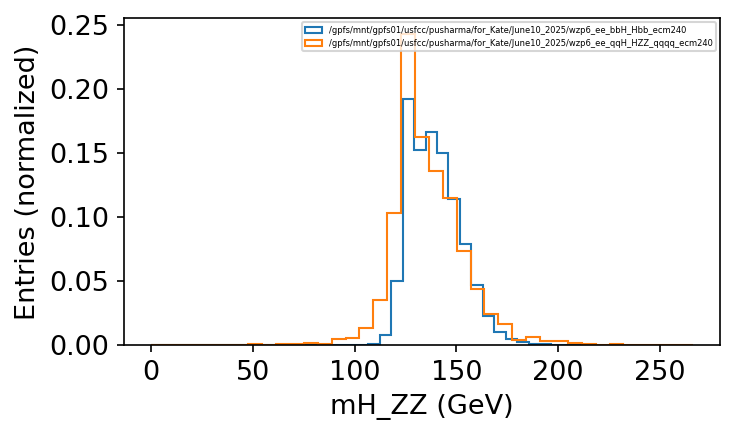

In [3]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mH_ZZ") 

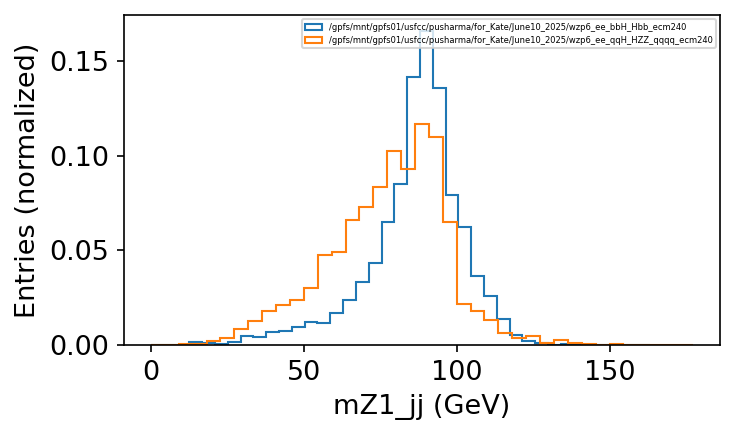

In [4]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ1_jj") 

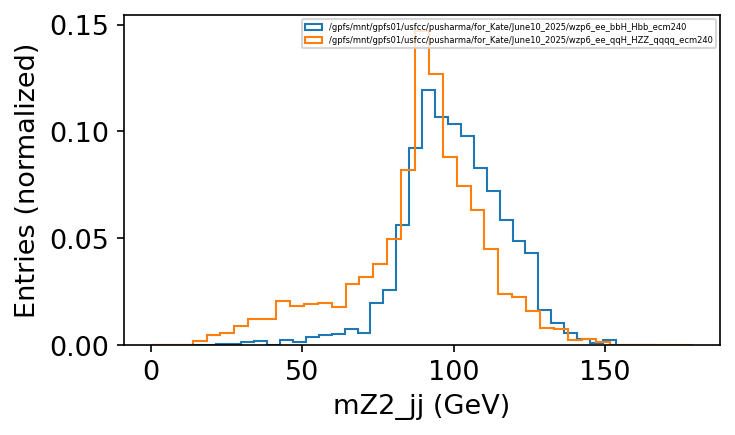

In [5]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZ2_jj") 

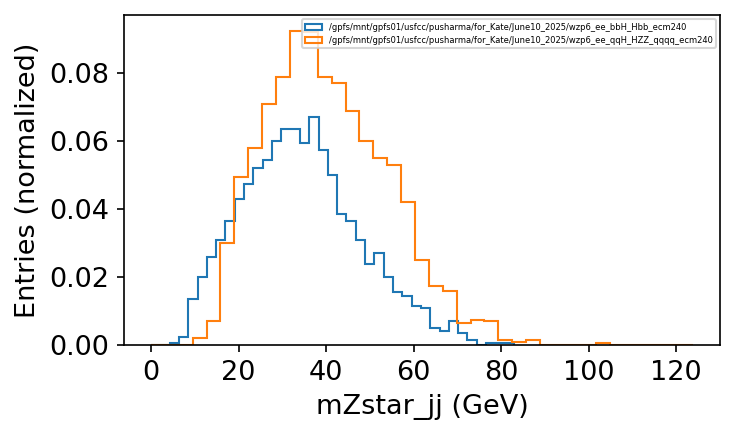

In [6]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_mZstar_jj") 

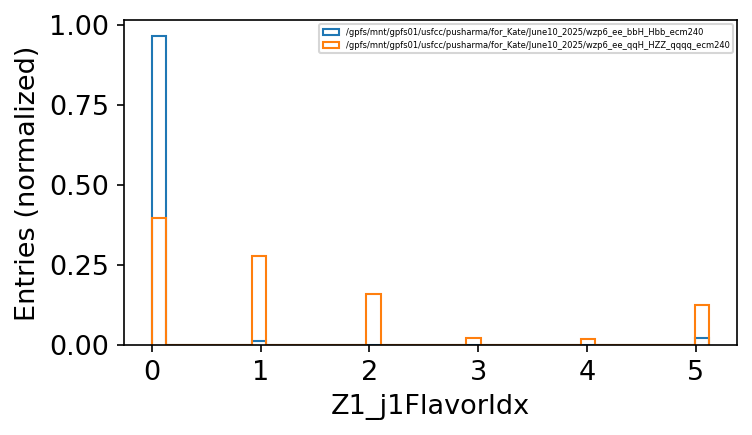

In [7]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z1_j1FlavorIdx") 

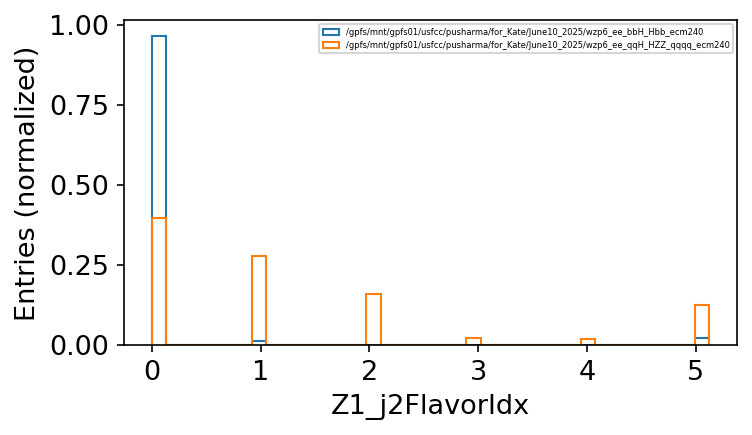

In [8]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z1_j2FlavorIdx") 

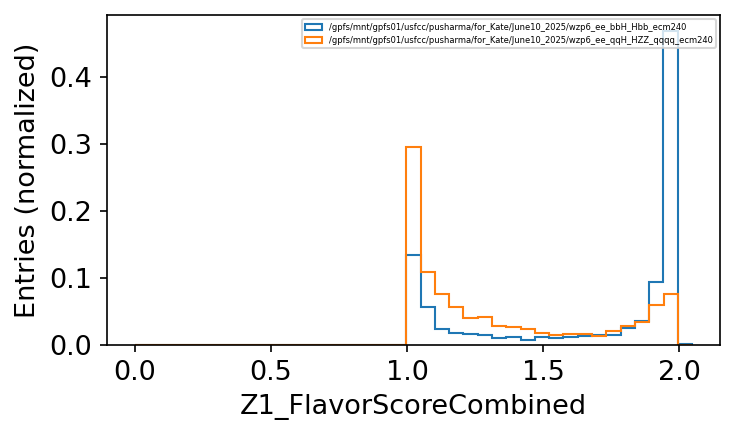

In [9]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z1_FlavorScoreCombined") 

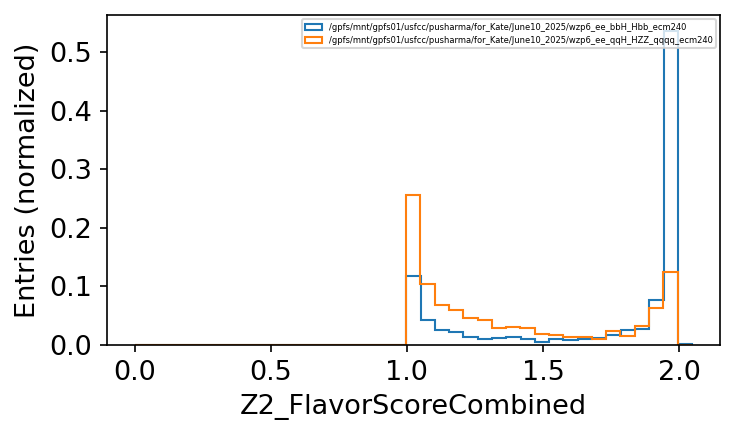

In [10]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z2_FlavorScoreCombined") 

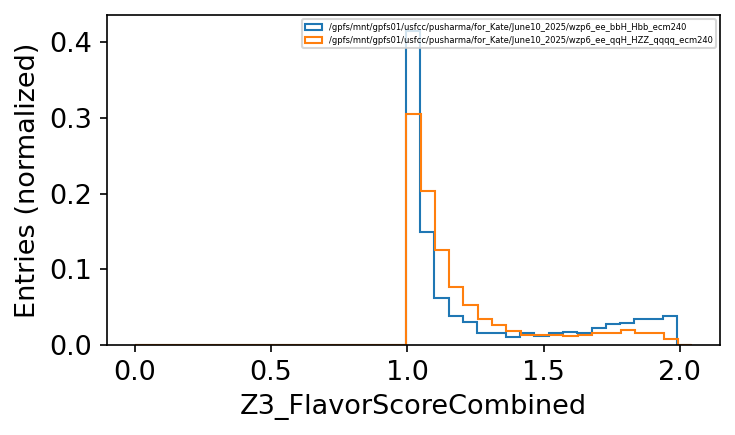

In [11]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z3_FlavorScoreCombined") 

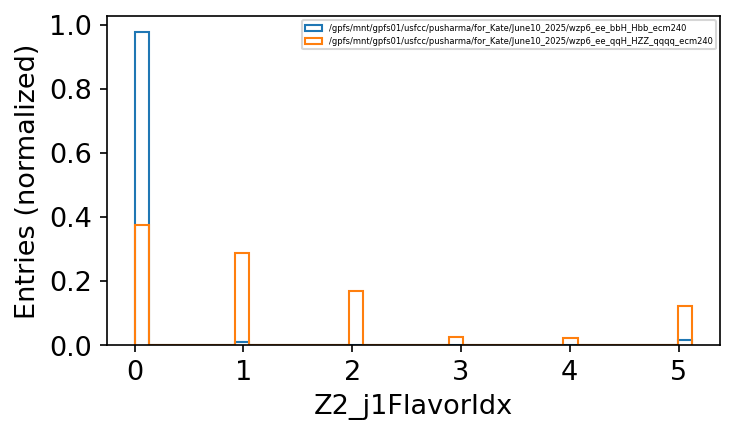

In [12]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z2_j1FlavorIdx") 

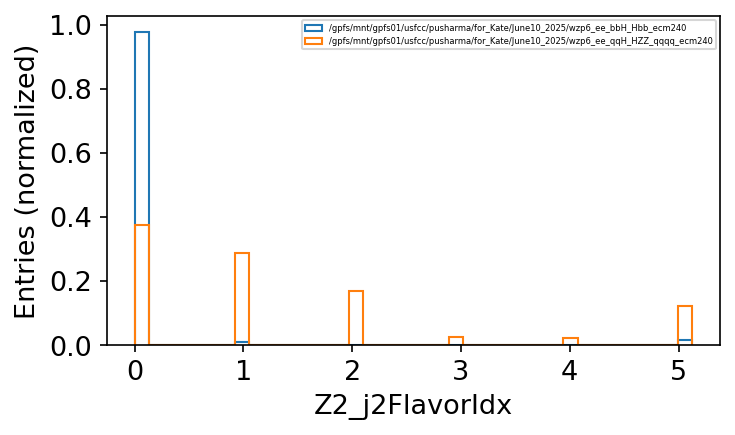

In [13]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Z2_j2FlavorIdx") 

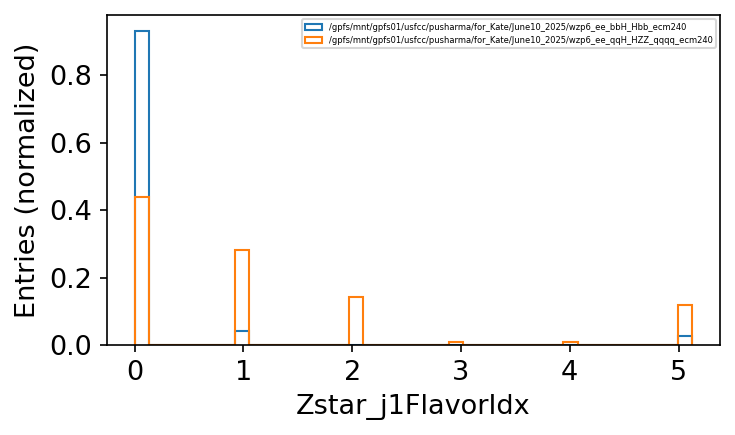

In [14]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Zstar_j1FlavorIdx") 

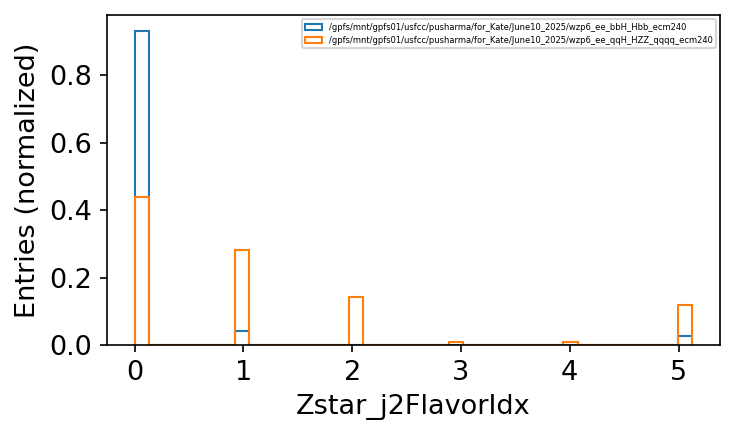

In [15]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_Zstar_j2FlavorIdx") 

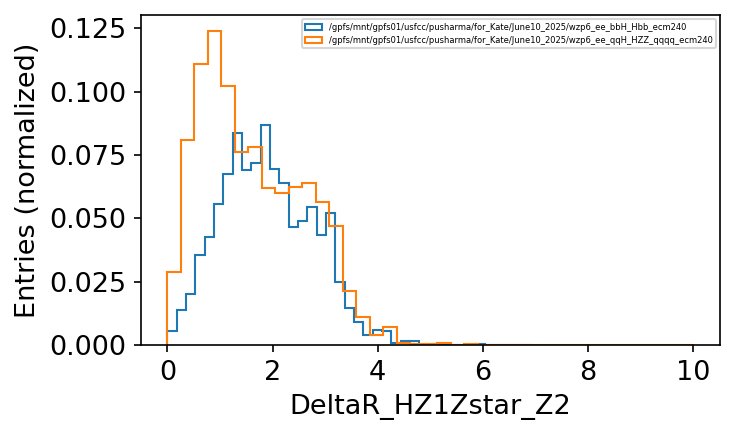

In [16]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_DeltaR_HZ1Zstar_Z2") 

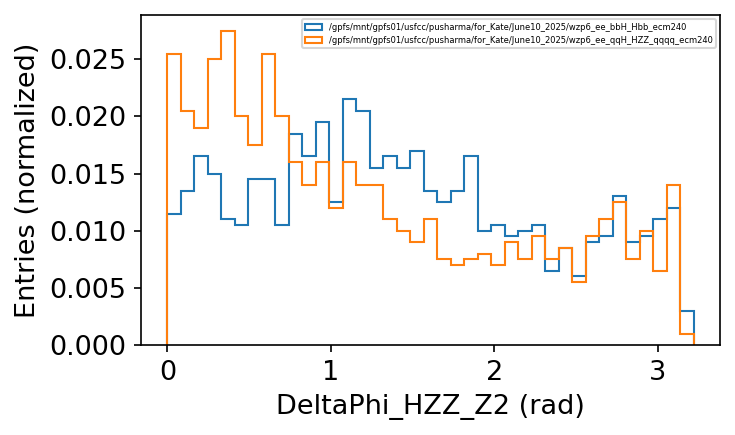

In [17]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_DeltaPhi_HZZ_Z2") 

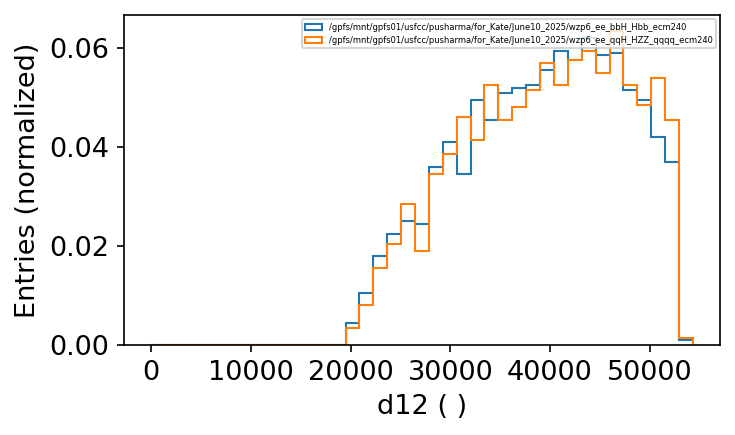

In [18]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d12") 

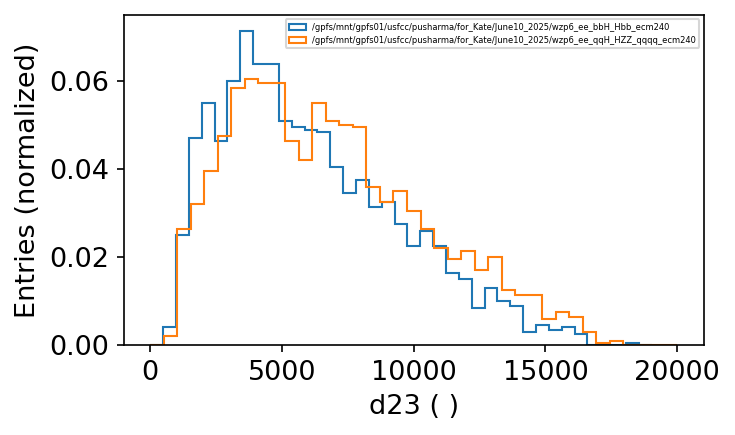

In [19]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d23") 

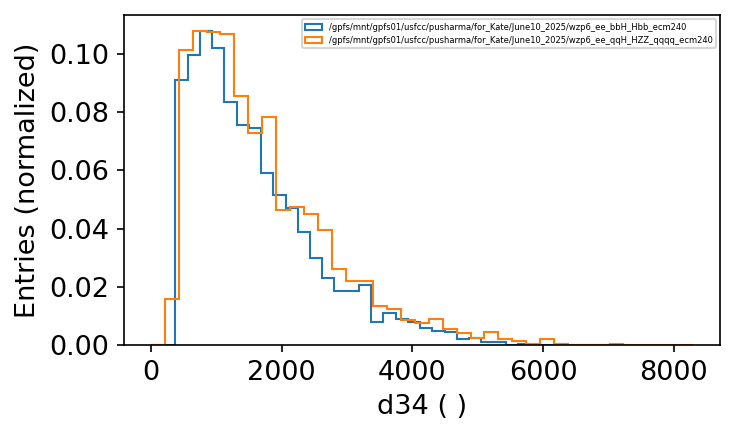

In [20]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d34") 

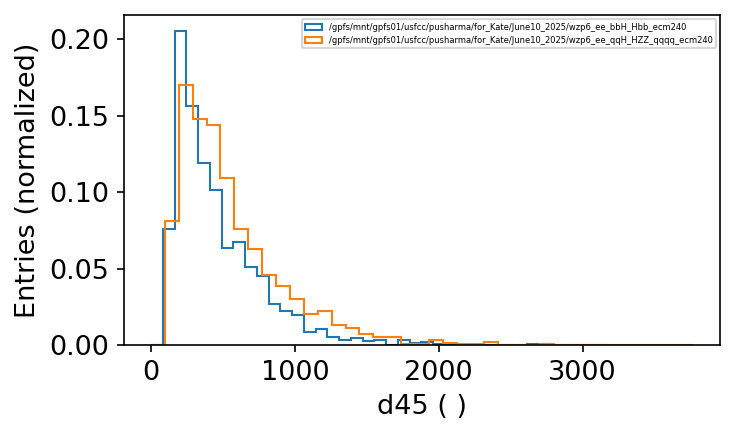

In [21]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d45") 

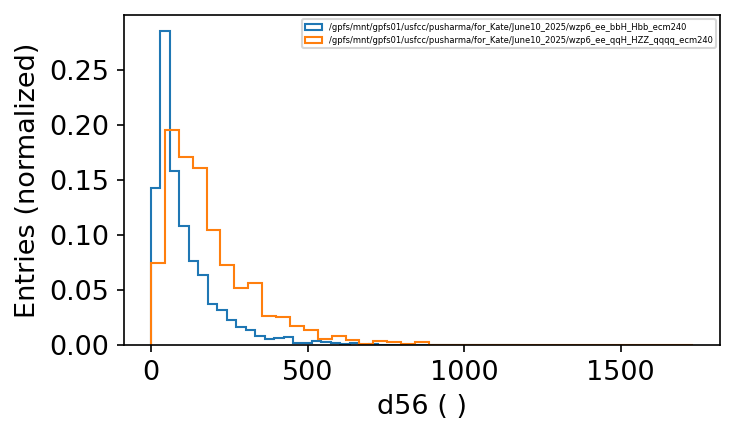

In [22]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_d56") 

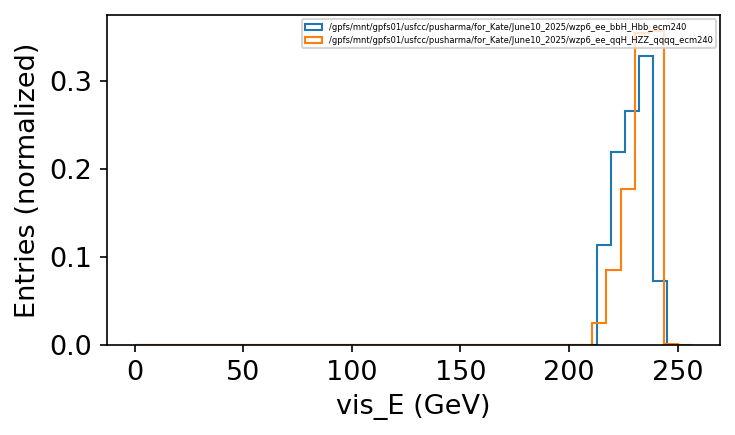

In [23]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_vis_E") 

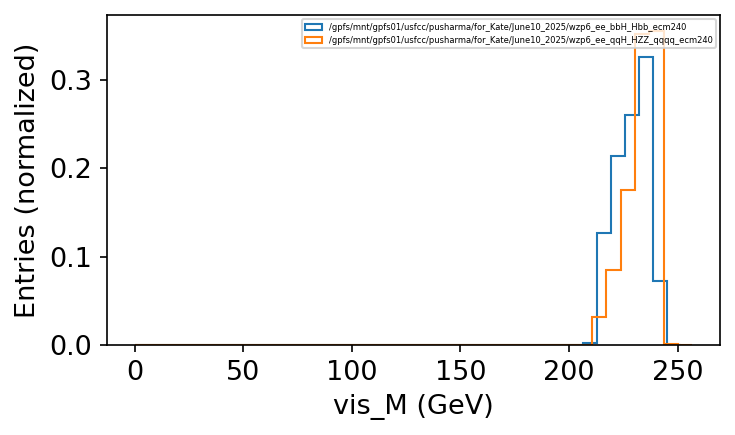

In [24]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_vis_M") 

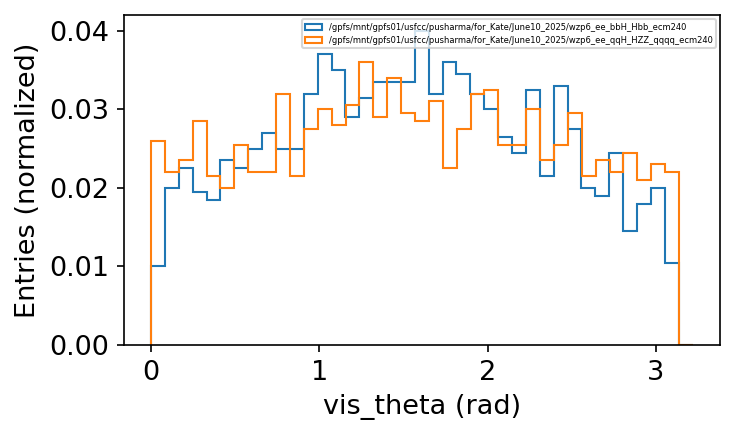

In [25]:
Plot_Variable_Together(["/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root"], "b_vis_theta") 

### Working on training BDT for five background files

#### Training BDT for one signal five background

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
back_file = [back1, back2, back3, back4, back5]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state = 15, max_features = 5)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

In [ ]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [ ]:
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

In [ ]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

plt.plot(log_losses_train)
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.show()

In [ ]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Running the code with one background file

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back5]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)


y_pred = gbc.predict_proba(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.6354           13.19m
         2           0.6230           13.21m
         3           0.6123           13.02m
         4           0.6028           12.93m
         5           0.5944           12.79m
         6           0.5868           12.80m
         7           0.5799           12.57m
         8           0.5737           12.41m
         9           0.5682           12.28m
        10           0.5632           12.17m
        20           0.5280           10.65m
        30           0.5077            9.22m
        40           0.4939            7.84m
        50           0.4834            6.49m
        60           0.4749            5.12m
        70           0.4678            3.80m
        80           0.4615            2.51m
        90           0.4562            1.25m
       100           0.4519            0.00s


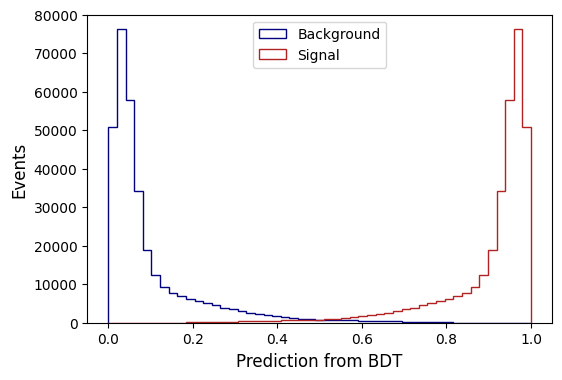

In [58]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

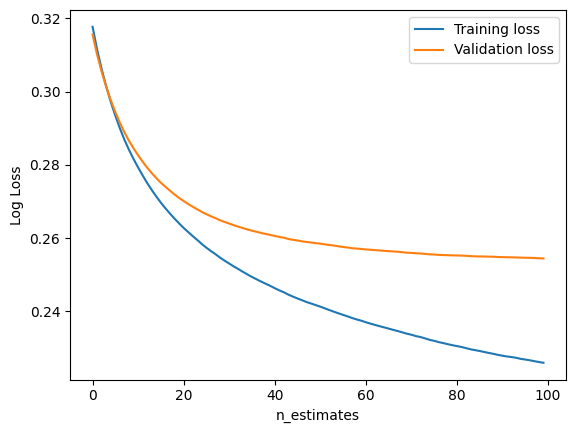

In [59]:
import sklearn
from sklearn.metrics import log_loss

log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

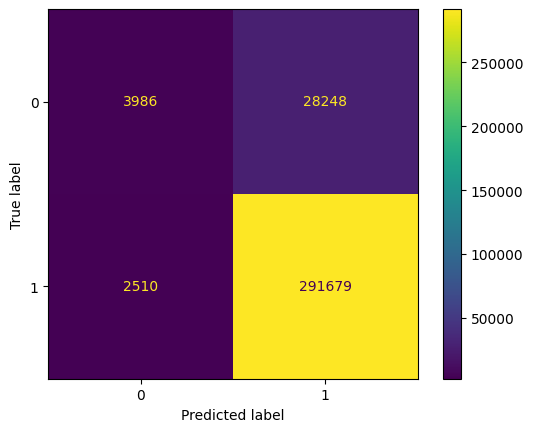

In [60]:
from sklearn import metrics

y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

AUC score:  0.8246258258701952


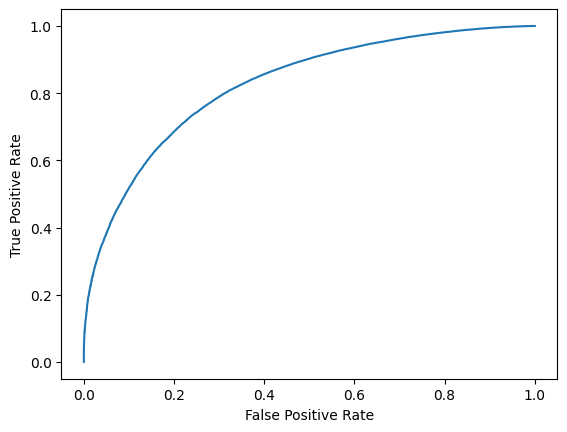

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

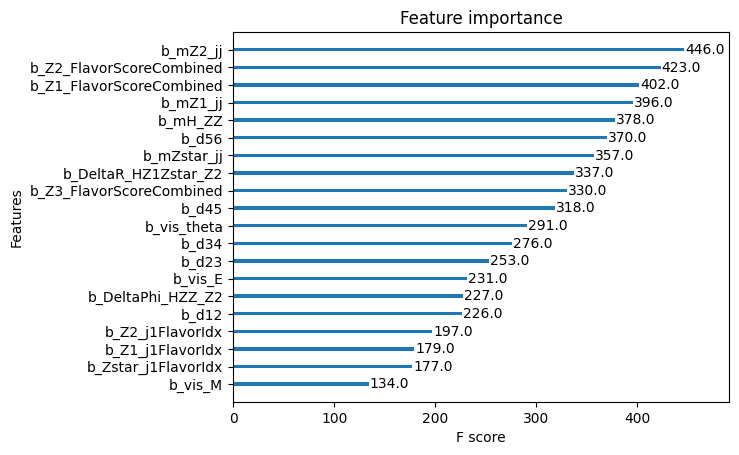

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Two background files

In [ ]:
back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back1, back2]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

In [ ]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [ ]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

In [ ]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Three background files

In [ ]:
back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back1, back2, back3]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

In [ ]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [ ]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

In [ ]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Four background files

In [ ]:
back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
#back_file = [back1, back2, back3, back4, back5]
back_file = [back1, back2, back3, back4]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

# combining those two dataframes into one dataframe
df = pd.concat([combined_background_df, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15)

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state = 15, max_features = 5, max_depth = 10, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

In [ ]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [ ]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

In [ ]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### Plotting all 6 files onto each other to see where similarities lie

In [ ]:
import uproot 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def Plot_Variable_Together(files, variable):
    
    # Make the plot
    fig, ax = plt.subplots(1, figsize=(5, 3), dpi=150)
    
    xmin, nbins = 0, 40 # set binning
    label_dict = {
        "b_mH_ZZ": ['mH_ZZ (GeV)'],
        "b_mZ1_jj": ['mZ1_jj (GeV)'],
        "b_mZ2_jj": ['mZ2_jj (GeV)'],
        "b_mZstar_jj": ['mZstar_jj (GeV)'],
        "b_Z1_j1FlavorIdx": ['Z1_j1FlavorIdx'],
        "b_Z1_j2FlavorIdx": ['Z1_j2FlavorIdx'],
        "b_Z1_FlavorScoreCombined": ['Z1_FlavorScoreCombined'],
        "b_Z2_FlavorScoreCombined": ['Z2_FlavorScoreCombined'],
        "b_Z3_FlavorScoreCombined": ['Z3_FlavorScoreCombined'],
        "b_Z2_j1FlavorIdx": ['Z2_j1FlavorIdx'],
        "b_Z2_j2FlavorIdx": ['Z2_j2FlavorIdx'],
        "b_Zstar_j1FlavorIdx": ['Zstar_j1FlavorIdx'],
        "b_Zstar_j2FlavorIdx": ['Zstar_j2FlavorIdx'],
        "b_DeltaR_HZ1Zstar_Z2": ['DeltaR_HZ1Zstar_Z2'],
        "b_DeltaPhi_HZZ_Z2": ['DeltaPhi_HZZ_Z2 (rad)'],
        "b_d12": ['d12 ( )'],
        "b_d23": ['d23 ( )'],
        "b_d34": ['d34 ( )'],
        "b_d45": ['d45 ( )'],
        "b_d56": ['d56 ( )'],
        "b_vis_E": ['vis_E (GeV)'],
        "b_vis_M": ['vis_M (GeV)'],
        "b_vis_theta": ['vis_theta (rad)']
    }

    nevents = 2000
    ylabel = "Entries"
    normalize = 1
    x_info = label_dict[variable]
    xlabel = x_info[0]

    # For each file, add its histogram to the plot
    for f in files:    
        u_f = uproot.open(f) # open file with uproot
        tree = u_f["analysis"] # define events tree
        #t.keys() # print all branches # print all branches

        array = tree[variable].array(library="pd")
        xmax = max(array) * 1.025

        #takes all that is in the "variable" from the branch and arranges it into a numpy array
        variable_values = tree[variable].array(library="np")
        variable_values = variable_values[:nevents] # take first nevents only
        variable_values = variable_values.flatten()
        #variable_values = np.concatenate(variable_values).ravel() # Flatten the array of arrays

        bins = np.linspace(xmin, xmax, nbins)  
        counts, bins = np.histogram(variable_values, bins=bins)
        avg, stdev = np.mean(variable_values), np.std(variable_values) # save average and standard deviation
        if(normalize): 
            counts = [c/nevents for c in counts]
            ylabel = "Entries (normalized)"
        
        if f == '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root':
            legend_entry = 'Signal'
            ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step', color='red')
        else:
            legend_entry = 'Background'
            ax.hist(bins[:-1], bins, weights=counts, label = legend_entry, histtype='step', color='blue')

    fontsize = 13
    # Set axis labels with custom font size - 
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(axis='both', labelsize=fontsize) # make the tick label sizes larger as well, so that others will be able to see when you share the plot
    plt.legend(fontsize = 4, loc = 'upper right')
    
    fig.tight_layout()
    fig.show()

In [ ]:
Plot_Variable_Together(['/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root', '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'], 'b_mH_ZZ')

#### resampled data and hyperparameter tuning

In [ ]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
back_file = [back1, back2, back3, back4, back5]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

background_downsampled = resample(combined_background_df, replace=False, n_samples=len(signal_df), random_state=15)

# combining those two dataframes into one dataframe
df = pd.concat([background_downsampled, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15, stratify=df['Label'])

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(n_estimators = 400, learning_rate = 0.05, random_state = 15, max_depth = 7, verbose = 1)
gbc.fit(X_train, y_train)

y_pred = gbc.predict_proba(X_test)

In [ ]:
prob_back = y_pred[:, 0]
prob_sign = y_pred[:, 1]

plt.figure(figsize=(6, 4))
plt.hist(prob_back, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Background')
plt.hist(prob_sign, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Signal')
plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=5)
scores = cross_val_score(gbc, X_test, y_test, cv = k_folds)

print("Average CV Score: ", scores.mean())

In [ ]:
log_losses_train = []
for y_pred in gbc.staged_predict_proba(X_train):
    loss_train = sklearn.metrics.log_loss(y_train, y_pred)
    log_losses_train.append(loss_train)

log_losses_test = []
for y_pred in gbc.staged_predict_proba(X_test):
    loss_test = sklearn.metrics.log_loss(y_test, y_pred)
    log_losses_test.append(loss_test)

plt.plot(log_losses_train, label='Training loss')
plt.plot(log_losses_test, label='Validation loss')
plt.xlabel("n_estimates")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

In [ ]:
y_pred_binary = gbc.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print("AUC score: ", roc_auc_score(y_test, y_pred_proba))

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred1 = model.predict_proba(X_test)
y_pred_binary1 = model.predict(X_test)

xgb.plot_importance(model,grid=False)

#### hyperparameter tuning using GridSearchCV

In [ ]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
back_file = [back1, back2, back3, back4, back5]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

background_downsampled = resample(combined_background_df, replace=False, n_samples=len(signal_df), random_state=15)

# combining those two dataframes into one dataframe
df = pd.concat([background_downsampled, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15, stratify=df['Label'])

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# creating parameter grid
param_grid = {'n_estimators': [100, 200],
              'learning_rate': [0.05, 0.1], 
              'max_depth': [3, 5]}

# creating the decision tree algorithm from the training set
gbc = GradientBoostingClassifier(random_state = 15, verbose = 2)
grid_search = GridSearchCV(estimator=gbc, param_grid = param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict_proba(X_test)
accuracy_best = roc_auc_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy_best)

#### hyperparameter tuning using RandomizedSearchCV

#### random forest classifier

In [ ]:
import random
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

back1 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_bbH_Hss_ecm240/Job0.root'
back2 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HZa_ecm240/Job0.root'
back3 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ccH_HWW_ecm240/Job0.root'
back4 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_Hss_ecm240/Job0.root'
back5 = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_ssH_HZa_ecm240/Job0.root'
signal_file = '/usatlas/u/pusharma/usfccdata/for_Kate/June23_2025/stage2_05032025/wzp6_ee_qqH_HZZ_qqqq_ecm240/Job0.root'

# background
back_file = [back1, back2, back3, back4, back5]
combined_background_df = pd.DataFrame()

for b in back_file: 
    # opening all the background files
    background = uproot.open(b)
    background_tree = background["analysis"]
    background_df = background_tree.arrays(background_tree.keys(), library="pd")
    background_df['Label'] = 0
        
    # combining all background files
    combined_background_df = pd.concat([background_df, combined_background_df])

# signal
signal = uproot.open(signal_file)
signal_tree = signal["analysis"]
signal_df = signal_tree.arrays(signal_tree.keys(), library="pd")
signal_df['Label'] = 1

background_downsampled = resample(combined_background_df, replace=False, n_samples=len(signal_df), random_state=15)

# combining those two dataframes into one dataframe
df = pd.concat([background_downsampled, signal_df])

# splitting between test and train
train, test = train_test_split(df, test_size = 0.35, random_state = 15, stratify=df['Label'])

# training dataset - separating data vs training columns - but without b_w
X_train = train.drop(columns=['b_w', 'Label'])
y_train = train['Label']

# testing dataset - separating data vs training columns - but without b_w
X_test = test.drop(columns=['b_w', 'Label'])
y_test = test['Label']

# dictionary for hyperparameter tuning
parameter = {'n_estimates': randint(50,500), 'max_depth': randint(1,20)}

# creating the random forest classifier
rf = RandomForestClassifier(random_state = 15, verbose = 1)

# finding the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = parameter, n_inter=5, cv=5)

#fit rf w/hyperparameters to training data
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_test)

### working on classes

In [74]:
import uproot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

variables = ['b_mH_ZZ', 
             'b_mZ1_jj',
             'b_mZ2_jj',
             'b_mZstar_jj',
             'b_Z1_j1FlavorIdx',
             'b_Z1_j2FlavorIdx',
             'b_Z1_FlavorScoreCombined',
             'b_Z2_FlavorScoreCombined',
             'b_Z3_FlavorScoreCombined',
             'b_Z2_j1FlavorIdx',
             'b_Z2_j2FlavorIdx',
             'b_Zstar_j1FlavorIdx',
             'b_Zstar_j2FlavorIdx',
             'b_DeltaR_HZ1Zstar_Z2',
             'b_DeltaPhi_HZZ_Z2',
             'b_d12',
             'b_d23',
             'b_d34',
             'b_d45',
             'b_d56',
             'b_vis_E',
             'b_vis_M',
             'b_vis_theta']

class SignalBackgroundBDT:
    def __init__(self, signal_file, background_file, variables):
        self.signal_file = signal_file
        self.background_file = background_file
        self.variables = variables


    def open_files(self):
        # opening background
        u_f1 = uproot.open(self.background_file)
        tree1 = u_f1['analysis']
        self.df1 = tree1.arrays(self.variables, library='pd')
        self.df1['Label'] = 0

        # opening signal
        u_f2 = uproot.open(self.signal_file)
        tree2 = u_f2['analysis']
        self.df2 = tree2.arrays(self.variables, library='pd')
        self.df2['Label'] = 1

    def combine_and_split_files(self):
        df = pd.concat([self.df1, self.df2], ignore_index=True)
        df = df.sample(frac=1, random_state=15,).reset_index(drop=True)
        train, test = train_test_split(df, test_size=0.25, random_state=15)

        self.X_train = train[self.variables]
        self.y_train = train['Label']

        self.X_test = test[self.variables]
        self.y_test = test['Label']

    def gbcModel(self):
        self.gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=15, max_depth=5)
        self.gbc.fit(self.X_train, self.y_train)
        self.y_pred = self.gbc.predict_proba(self.X_test)

        prob_bac = self.y_pred[:, 0]
        prob_sig = self.y_pred[:, 1]

        plt.figure(figsize=(6, 4))
        plt.hist(prob_bac, bins=np.linspace(0,1,50), histtype='step', color='firebrick', label='Background')
        plt.hist(prob_sig, bins=np.linspace(0,1,50), histtype='step', color='navy', label='Signal')
        plt.xlabel('Prediction from BDT', fontsize=12)
        plt.ylabel('Events', fontsize=12)
        plt.legend()

    def plot_log_loss(self):
        log_losses_train = []
        for self.y_pred in self.gbc.staged_predict_proba(self.X_train):
            loss_train = sklearn.metrics.log_loss(self.y_train, self.y_pred)
            log_losses_train.append(loss_train)
            
        log_losses_test = []
        for self.y_pred in self.gbc.staged_predict_proba(self.X_test):
            loss_test = sklearn.metrics.log_loss(self.y_test, self.y_pred)
            log_losses_test.append(loss_test)
            
        plt.plot(log_losses_train, label='Training loss')
        plt.plot(log_losses_test, label='Validation loss')
        plt.xlabel("n_estimates")
        plt.ylabel("Log Loss")
        plt.legend()
        plt.show()

    def confusion_matrix(self):
        y_pred_binary = self.gbc.predict(self.X_test)

        cm = metrics.confusion_matrix(self.y_test, y_pred_binary)
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1])

        cm_display.plot()
        plt.show()

    def AUC_ROC(self):
        y_pred_proba = self.gbc.predict_proba(self.X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_proba)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        print("AUC score: ", roc_auc_score(self.y_test, y_pred_proba))

    def feature_importance(self):
        xgbmodel = XGBClassifier()
        xgbmodel.fit(self.X_train, self.y_train)

        y_pred1 = xgbmodel.predict_proba(self.X_test)
        y_pred_binary1 = xgbmodel.predict(self.X_test)

        xgb.plot_importance(xgbmodel, grid=False)
        

In [75]:
bdt = SignalBackgroundBDT("/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_qqH_HZZ_qqqq_ecm240.root", "/gpfs/mnt/gpfs01/usfcc/pusharma/for_Kate/June10_2025/wzp6_ee_bbH_Hbb_ecm240.root", variables)

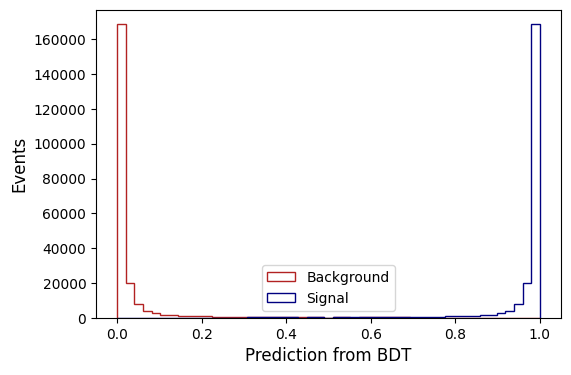

In [78]:
bdt.open_files()
bdt.combine_and_split_files()
bdt.gbcModel()

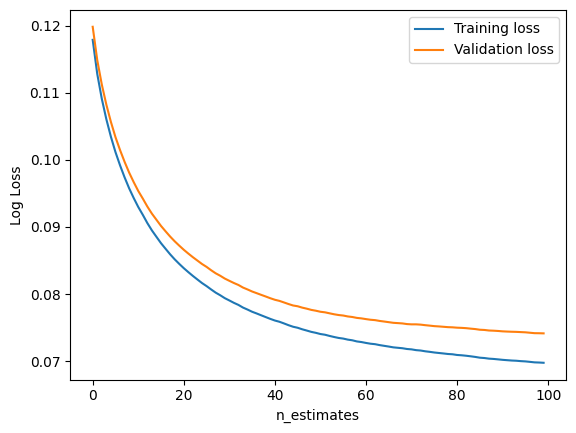

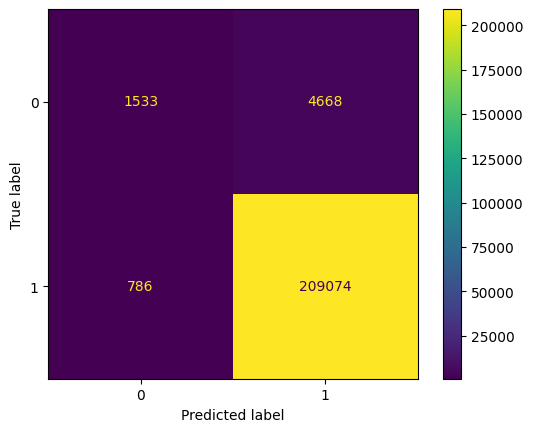

AUC score:  0.9492467052431557


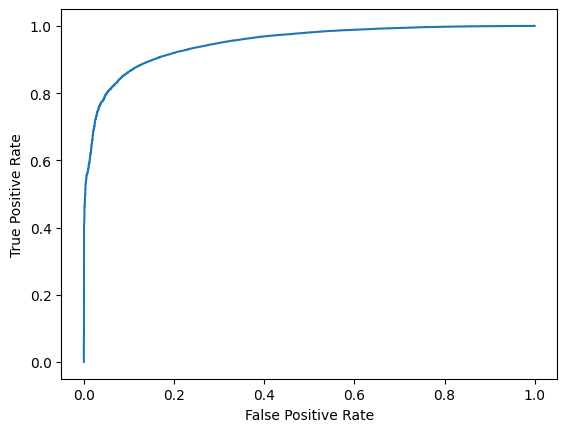

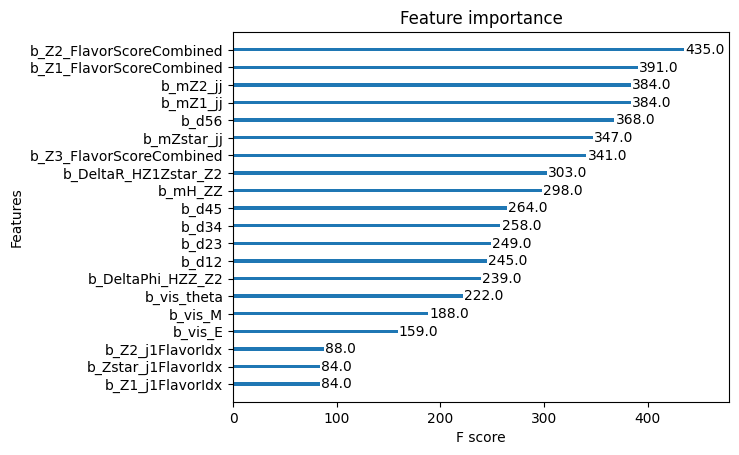

In [79]:
bdt.plot_log_loss()
bdt.confusion_matrix()
bdt.AUC_ROC()
bdt.feature_importance()